In [351]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
#Le polynome que l'on souhaite découvir, il est utilisé pour générer des données
#mais sera supposé inconnu par la suite
def poly(x):
    #1x³-3x²+3x-5
    return 1*x*x*x - 3*x*x + 3*x - 5

In [353]:
#On génère un ensemble de points (x,y) à partir du polynome pour le training
xTrain = [val for val in xrange(-4,6)]
xTrain = np.array(xTrain)
yTrain = map(poly, xTrain)
#On génère un ensemble de points (x,y) à partir du polynome pour la validation
xTest = [-3.4,-1.9, -0.5, 1.1, 1.5, 3.6,  4.8]
xTest = np.array(xTest)
yTest = map(poly, xTest)

#################################################
#Etant donné que dans la réalité les données ne sont pas parfaites mais contiennent toujours du bruit
#nous allons le simuler en ajoutant un bruit aléatoire aux valeurs de y

rs = np.random.RandomState(1) #fixe l'état aléatoire pour pouvoir reproduire le meme bruit à chaque exécution du code
noise = 10*rs.randn(len(xTrain)) #on genere autant de bruit que de données (x,y)
yTrainNoisy = yTrain + noise #on ajoute le bruit aux valeurs y

noise = 10*rs.randn(len(xTest))
yTestNoisy = yTest + noise

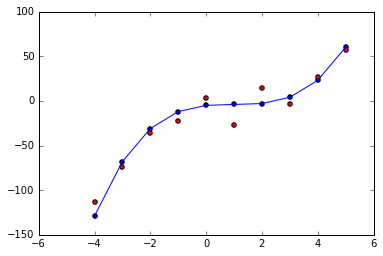

In [354]:
plt.plot(xTrain,yTrain, c='blue')    #on dessine la courbe représentant les données non bruités en bleu
plt.scatter(xTrain,yTrain, c='blue') #on place les points non bruités en bleu
plt.scatter(xTrain, yTrainNoisy, c='red') #on place les points bruités en rouge

In [363]:
#Prediction avec les données NON BRUITEES

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Puisqu'on souhaite découvrir le modèle (le polynome que l'on ne connait pas) à partir des donnés (x,y)
#le polynome peut être écrit sous la forme : w0*x0 + w1*x1 + w2*x2 + w3*x3 + w4*x4+.....+wn*xn
#où chaque attribut xn correspond à x^n
#on doit donc trouver les paramètres W de manière à ce que le modèle trouvé soit :
#  -5*x0 + 3*x1 -3*x2 + 1*x3 
#Nous allons créer en nous basant sur les valeur de x, une matrice ou chaque colonne correspond à un attribut x^d
#la première colonne est la colonne des 1 puisque x0=1

trainPoly = np.array( [xTrain**d for d in xrange(1,10) ] ).transpose()
testPoly = np.array( [xTest**d for d in xrange(1,10) ] ).transpose()

#puisque on ne connait pas le dégré du polynome que l'on cherche, nous allons tester différents modèles
# de degrés différents et choisir celui qui donne le meilleur score

for d in [1,2,3,4,5,6,7,8,9,10]:
    train = trainPoly[:,:d] #on choisit les d premières colonnes, ce qui correspons à un polynome de degré d-1
    test = testPoly[:,:d]
    
    LR = LinearRegression()
    LR.fit(train, yTrain) #on applique la régression linéaire
    
    predTrain = LR.predict(train) # on prédit pour train
    predTest = LR.predict(test)   # on prédit pour les données de validation
    
    #on affiche l'erreur RMSE ainsi que les coefficients du modèle calculés
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrain)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTest))
    print LR.coef_[::-1], LR.intercept_
    print 

#le meilleur modèle touvé est de degré 3 avec les coefficients [ 1. -3.  3.] -5.0 ce qui correspond 
#exactement aux coefficients du polynome que l'on cherchait.

degre= 1  train : 20.6804255275      test :  15.6801730493
[ 15.4] -24.2

degre= 2  train : 17.5749822191      test :  14.2573727694
[ -1.5  16.9] -12.2

degre= 3  train : 4.91829551752e-14      test :  4.85446298403e-14
[ 1. -3.  3.] -5.0

degre= 4  train : 1.47714311864e-13      test :  1.40288115769e-13
[ -3.12250226e-16   1.00000000e+00  -3.00000000e+00   3.00000000e+00] -5.0

degre= 5  train : 1.47295853624e-12      test :  1.35051180558e-12
[ -7.87564458e-16   1.83533744e-15   1.00000000e+00  -3.00000000e+00
   3.00000000e+00] -5.0

degre= 6  train : 4.16463897551e-12      test :  3.91158259686e-12
[  8.32667268e-17  -2.39391840e-16  -3.24740235e-15   1.00000000e+00
  -3.00000000e+00   3.00000000e+00] -5.0

degre= 7  train : 4.07805500136e-12      test :  3.20659316024e-12
[  1.62218329e-15  -1.71737624e-16  -7.06101844e-14   3.44030360e-14
   1.00000000e+00  -3.00000000e+00   3.00000000e+00] -5.0

degre= 8  train : 2.49312926331e-11      test :  3.49630887323e-11
[  1.05390956e-

In [357]:
#Prediction avec les données BRUITEES

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

trainPoly = np.array( [xTrain**d for d in xrange(1,10) ] ).transpose()
testPoly = np.array( [xTest**d for d in xrange(1,10) ] ).transpose()

for d in xrange(1,10):
    train = trainPoly[:,:d]
    test = testPoly[:,:d]
    
    LR = LinearRegression(normalize=True)
    LR.fit(train, yTrainNoisy)
    
    predTrain = LR.predict(train)
    predTest = LR.predict(test)
    
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrainNoisy)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTestNoisy))
    print LR.coef_[::-1], LR.intercept_
    print
    
#avec les donnée bruitées, on voit que le meilleur score obtenu pour les données de training est celui correspondant
#au modèle de degré 9
#En effet, puisque nous avons 10 points d'apprentissage (bruités), la meilleure courbe passant par ces points
#est un polynome de degré 9 ( voir courbe ci-dessous)

#Le modèle de degré 9 est un modèle qui n'a pas appris le pattern qui se cache dans les données mais a appris
#le bruit qui se trouve dans les données, il est donc incapable de généraliser pour de nouvelles données.
#Et on voit que le score pour la validation est énorme

degre= 1  train : 18.240881368      test :  13.6711349505
[ 15.02262703] -24.9827224234

degre= 2  train : 16.6685525026      test :  12.7432757157
[ -1.01959133  16.04221836] -16.825991754

degre= 3  train : 10.3861360582      test :  9.70495894841
[ 0.74180496 -2.13229878  5.73112935] -11.4849960063

degre= 4  train : 10.2408713749      test :  8.9214641509
[ 0.04264851  0.65650794 -2.94262049  6.58409958] -9.64258032246

degre= 5  train : 10.1423968364      test :  9.90041417402
[-0.01604174  0.08275287  1.03081531 -3.5441859   4.8622857 ] -8.68007567427

degre= 6  train : 10.067859555      test :  10.7679492124
[ 0.0069244  -0.03681494 -0.10294695  1.43683696 -2.30786571  3.41949249] -9.88869825843

degre= 7  train : 10.0598770348      test :  11.003160853
[ -1.26340076e-03   1.13463029e-02   2.61008147e-04  -2.06691592e-01
   1.12956110e+00  -1.74099635e+00   4.05460317e+00] -10.3042952623

degre= 8  train : 9.38458761749      test :  10.1904819376
[-0.00759933  0.02913393  0.2454

degre= 10  train : 5.33584493804e-12      test :  93.4211976237
[ -1.80326535e-02   7.35476079e-02   5.89206933e-01  -2.09353548e+00
  -6.23910679e+00   1.72178089e+01   2.52967336e+01  -4.37244339e+01
  -2.17716515e+01] 3.65407629325



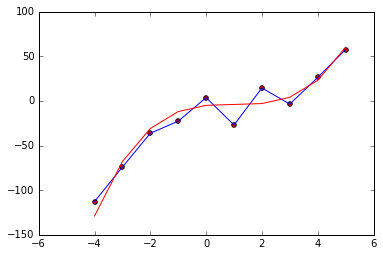

In [358]:
#On va tracer les courbes correspondant au modèle de degré 9

#On construit le modèle avec toutes les colonnes (d=10)
for d in [10]:
    train = trainPoly[:,:d]
    test = testPoly[:,:d]
    
    LR = LinearRegression(normalize=True)
    LR.fit(train, yTrainNoisy)
    
    predTrain = LR.predict(train)
    predTest = LR.predict(test)
    
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrainNoisy)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTestNoisy))
    print LR.coef_[::-1], LR.intercept_
    print

    
#plt.figure(figsize=(20,10))
plt.plot(xTrain, predTrain)
plt.plot(xTrain, yTrain, c='red')
plt.scatter(xTrain, yTrainNoisy, c='red')

#plt.scatter(xTest, yTestNoisy, c='green')

In [359]:
#RIDGE REGULARIZATION

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

trainPoly = np.array( [xTrain**d for d in xrange(0,11) ] ).transpose()
testPoly = np.array( [xTest**d for d in xrange(0,11) ] ).transpose()

for d in xrange(1,10):
    train = trainPoly[:,:d]
    test = testPoly[:,:d]
    
    LR = Ridge(alpha=1, normalize=True)
    LR.fit(train, yTrainNoisy)
    
    predTrain = LR.predict(train)
    predTest = LR.predict(test)
    
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrainNoisy)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTestNoisy))
    print LR.coef_[1:][::-1], LR.intercept_
    print

degre= 1  train : 46.8463890499      test :  37.5207527289
[] -17.4714089081

degre= 2  train : 28.2523159505      test :  19.5660126693
[ 7.51131352] -21.2270656657

degre= 3  train : 28.312630042      test :  19.5429380938
[ 0.06894608  7.47684047] -21.7958708464

degre= 4  train : 21.8017022052      test :  15.2355378417
[ 0.30209668 -0.29652752  5.33343286] -21.393849884

degre= 5  train : 21.871748668      test :  15.1786297491
[ 0.00553029  0.2979703  -0.35174989  5.3104158 ] -21.598559206

degre= 6  train : 19.9151117319      test :  14.2242715098
[  8.87064334e-03  -3.91351510e-03   2.40102932e-01  -4.76983326e-01
   4.67751601e+00] -21.007499772

degre= 7  train : 19.9683570462      test :  14.1806786803
[  1.96149112e-04   8.71209084e-03  -5.22514536e-03   2.37985526e-01
  -5.02477181e-01   4.67124797e+00] -21.0351292627

degre= 8  train : 19.4539766499      test :  13.9876954938
[  2.39158578e-04  -2.64870966e-05   7.46055928e-03  -9.25102514e-03
   2.15803247e-01  -5.466697

degre= 10  train : 10.7325578048      test :  8.30642378796
[  2.35656959e-06  -6.45260179e-06   1.86682491e-04  -1.87916861e-04
   9.11255321e-03  -1.97787234e-02   3.59339558e-01  -1.66109073e+00
   7.57071352e+00] -12.9363006149



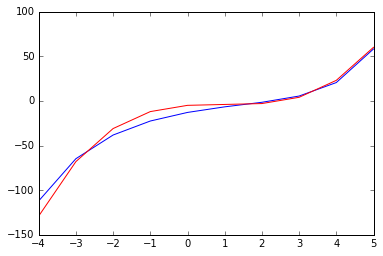

In [360]:
#On choisit un modèle de degré 9, alpha=0.05 est la meilleur valeur de régularization pour ce modèle
#On voit que l'erreur de validation est très petite comparée à la regression Lineaire
#On remarque aussi que les coefficients de degré élevé tendent vers 0
for d in [10]:
    train = trainPoly[:,:d]
    test = testPoly[:,:d]
    
    LR = Ridge(alpha=0.05, normalize=True)
    LR.fit(train, yTrainNoisy)
    
    predTrain = LR.predict(train)
    predTest = LR.predict(test)
    
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrainNoisy)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTestNoisy))
    print LR.coef_[1:][::-1], LR.intercept_
    print
    
plt.plot(xTrain, predTrain)
plt.plot(xTrain, yTrain, c='red')

In [361]:
#L'avantage de Lasso par rapport à Ridge est que les degrés non important possèdent un coefficient EGAL à 0

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

trainPoly = np.array( [xTrain**d for d in xrange(0,11) ] ).transpose()
testPoly = np.array( [xTest**d for d in xrange(0,11) ] ).transpose()

for d in [10]:
    train = trainPoly[:,:d]
    test = testPoly[:,:d]
    
    LR = Lasso(alpha=0.03, normalize=True)
    LR.fit(train, yTrainNoisy)
    
    predTrain = LR.predict(train)
    predTest = LR.predict(test)
    
    print 'degre=', d, ' train :'  , np.sqrt(mean_squared_error(predTrain, yTrainNoisy)),
    print '     test : ', np.sqrt(mean_squared_error(predTest, yTestNoisy))
    print LR.coef_[1:][::-1], LR.intercept_
    print

degre= 10  train : 10.2752526404      test :  9.07775173074
[ -0.00000000e+00   0.00000000e+00  -0.00000000e+00   8.27122442e-04
  -0.00000000e+00   0.00000000e+00   6.69803667e-01  -2.40282458e+00
   6.42076700e+00] -10.7316338576



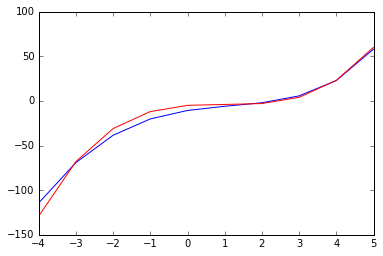

In [362]:
plt.plot(xTrain, predTrain)
plt.plot(xTrain, yTrain, c='red')

(81, 11)